In [4]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import starmap
import scipy as sci
import sympy as sp


In [6]:
f = pd.read_excel('Домашнее задание №2 ММР.xlsx')
f

,Добыча сырой нефти и природного газа; предоставление услуг в этих областях,№ п.п.,Прибыль (убыток),Долгосрочные обязательства,Краткосрочные обязательства,Оборотные активы,Основные средства,Дебиторская задолженность (краткосрочная),Запасы готовой продукции и товаров для перепродажи,Unnamed: 9,Unnamed: 10,"1. Проанализировать ряды данных. Посмотреть, если ли выбросы, если необходимо удалить. Обосновать удпаление."
0,NaN,NaN,Y,X1,X2,X3,X4,X5,Х6,NaN,NaN,2. Построить диаграммы рассеяния Прибыли с рег...
1,"Аганнефтегазгеология, открытое акционерное общ...",1.0,1440075,61749,1007355,4920199,5165712,3490541,31365,NaN,NaN,3. Построить корреляционную матрицу и провести...
2,"Азнакаевский горизонт, открытое акционерное об...",2.0,5146,17532,58110,50798,19595,23014,0,NaN,NaN,4. Построить модель со значимыми факторами. Фа...
3,"Акмай, Открытое акционерное общество",3.0,13612,20268,51271,18903,81072,8678,84,NaN,NaN,NaN
4,"Аксоль, Открытое акционерное общество Производ...",4.0,964,211,5827,13398,8446,4821,0,NaN,NaN,NaN
5,"Акционерная нефтяная Компания Башнефть, Открыт...",5.0,19513178,52034182,2411352,63269757,47002385,23780450,1696853,NaN,NaN,NaN
6,"АЛРОСА -Газ, Открытое акционерное общество",6.0,28973,602229,74839,367880,1545052,204181,19474,NaN,NaN,NaN
7,"Арктическая газовая компания, открытое акционе...",7.0,-780599,311268,15737048,3933712,740437,1456438,176,NaN,NaN,NaN
8,"Барьеганнефтегаз, Открытое акционерное общество",8.0,2598165,464651,4381403,5910831,11925177,5566412,127937,NaN,NaN,NaN
9,"Белкамнефть, Открытое акционерное общество",9.0,628091,214411,3728587,5325806,2580485,4285041,73823,NaN,NaN,NaN


In [32]:
Y = f.iloc[1:, 2].to_list()
X1 = f.iloc[1:, 3].to_list()
X2 = f.iloc[1:, 4].to_list()
X3 = f.iloc[1:, 5].to_list()
X4 = f.iloc[1:, 6].to_list()
X5 = f.iloc[1:, 7].to_list()
X6 = f.iloc[1:, 8].to_list()

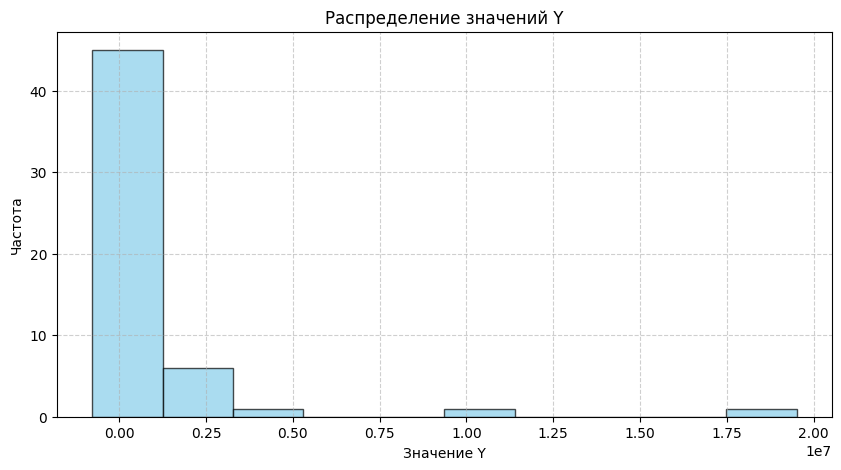

In [33]:
df = pd.DataFrame({'Y': Y})


plt.figure(figsize=(10, 5))
plt.hist(df['Y'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)


plt.title('Распределение значений Y')
plt.xlabel('Значение Y')
plt.ylabel('Частота')


plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

<Figure size 2000x1000 with 0 Axes>

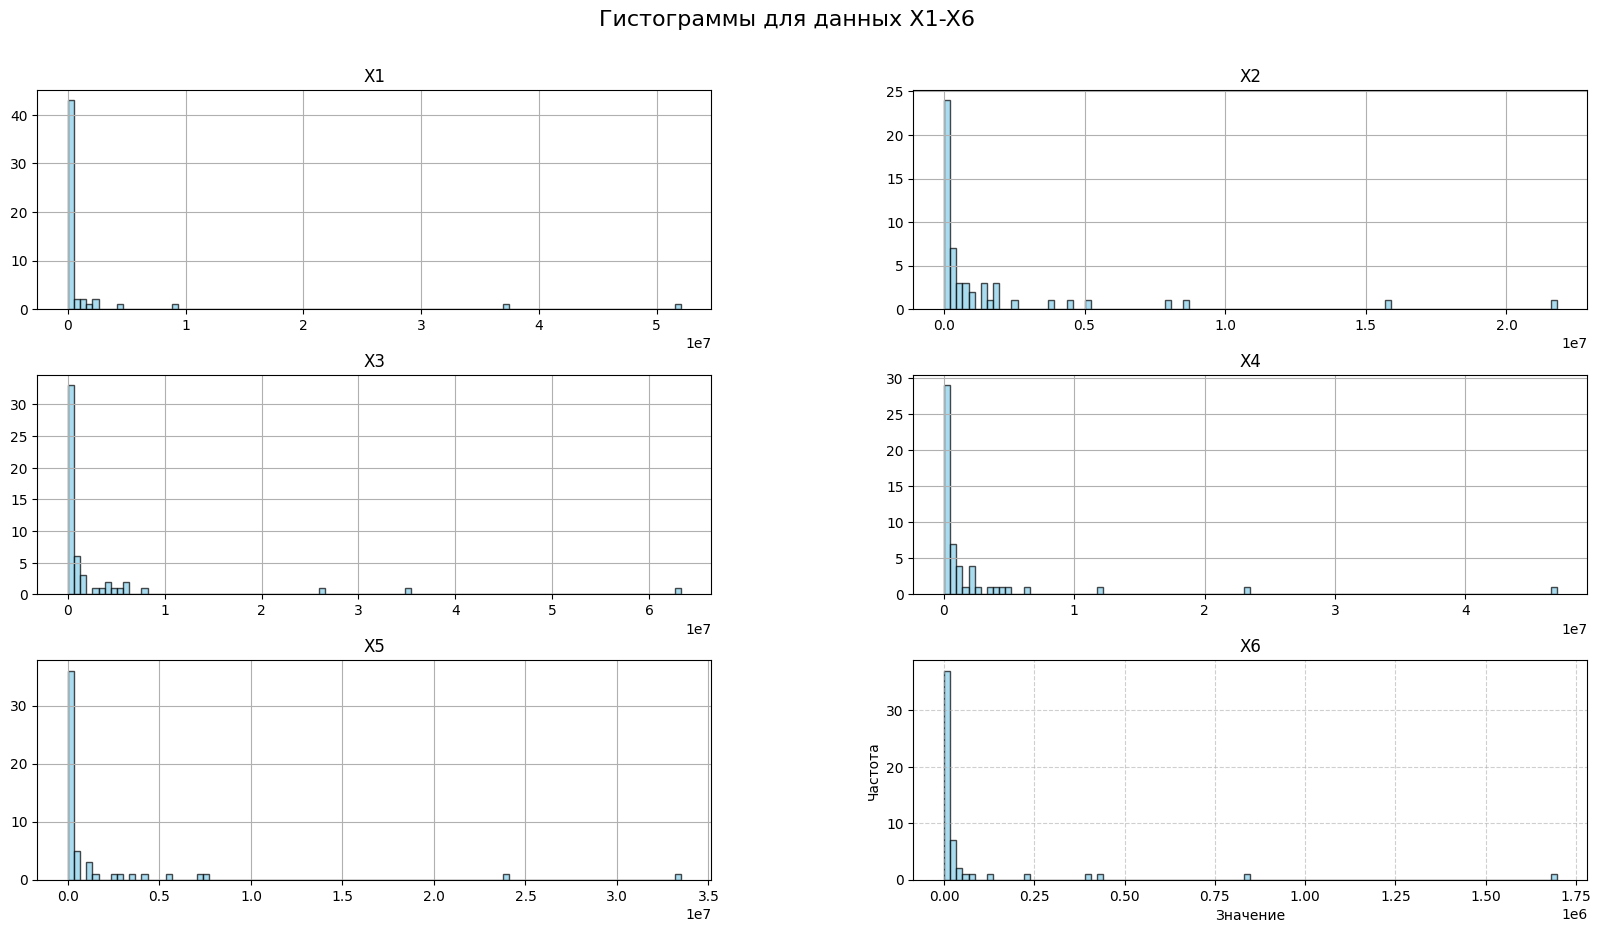

In [34]:
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6})


plt.figure(figsize=(20, 10))
df.hist(figsize=(20, 10), bins=100, color='skyblue', edgecolor='black', alpha=0.7)

plt.suptitle('Гистограммы для данных X1-X6', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.xlabel('Значение')
plt.ylabel('Частота')


plt.grid(True, linestyle='--', alpha=0.6)


plt.show()

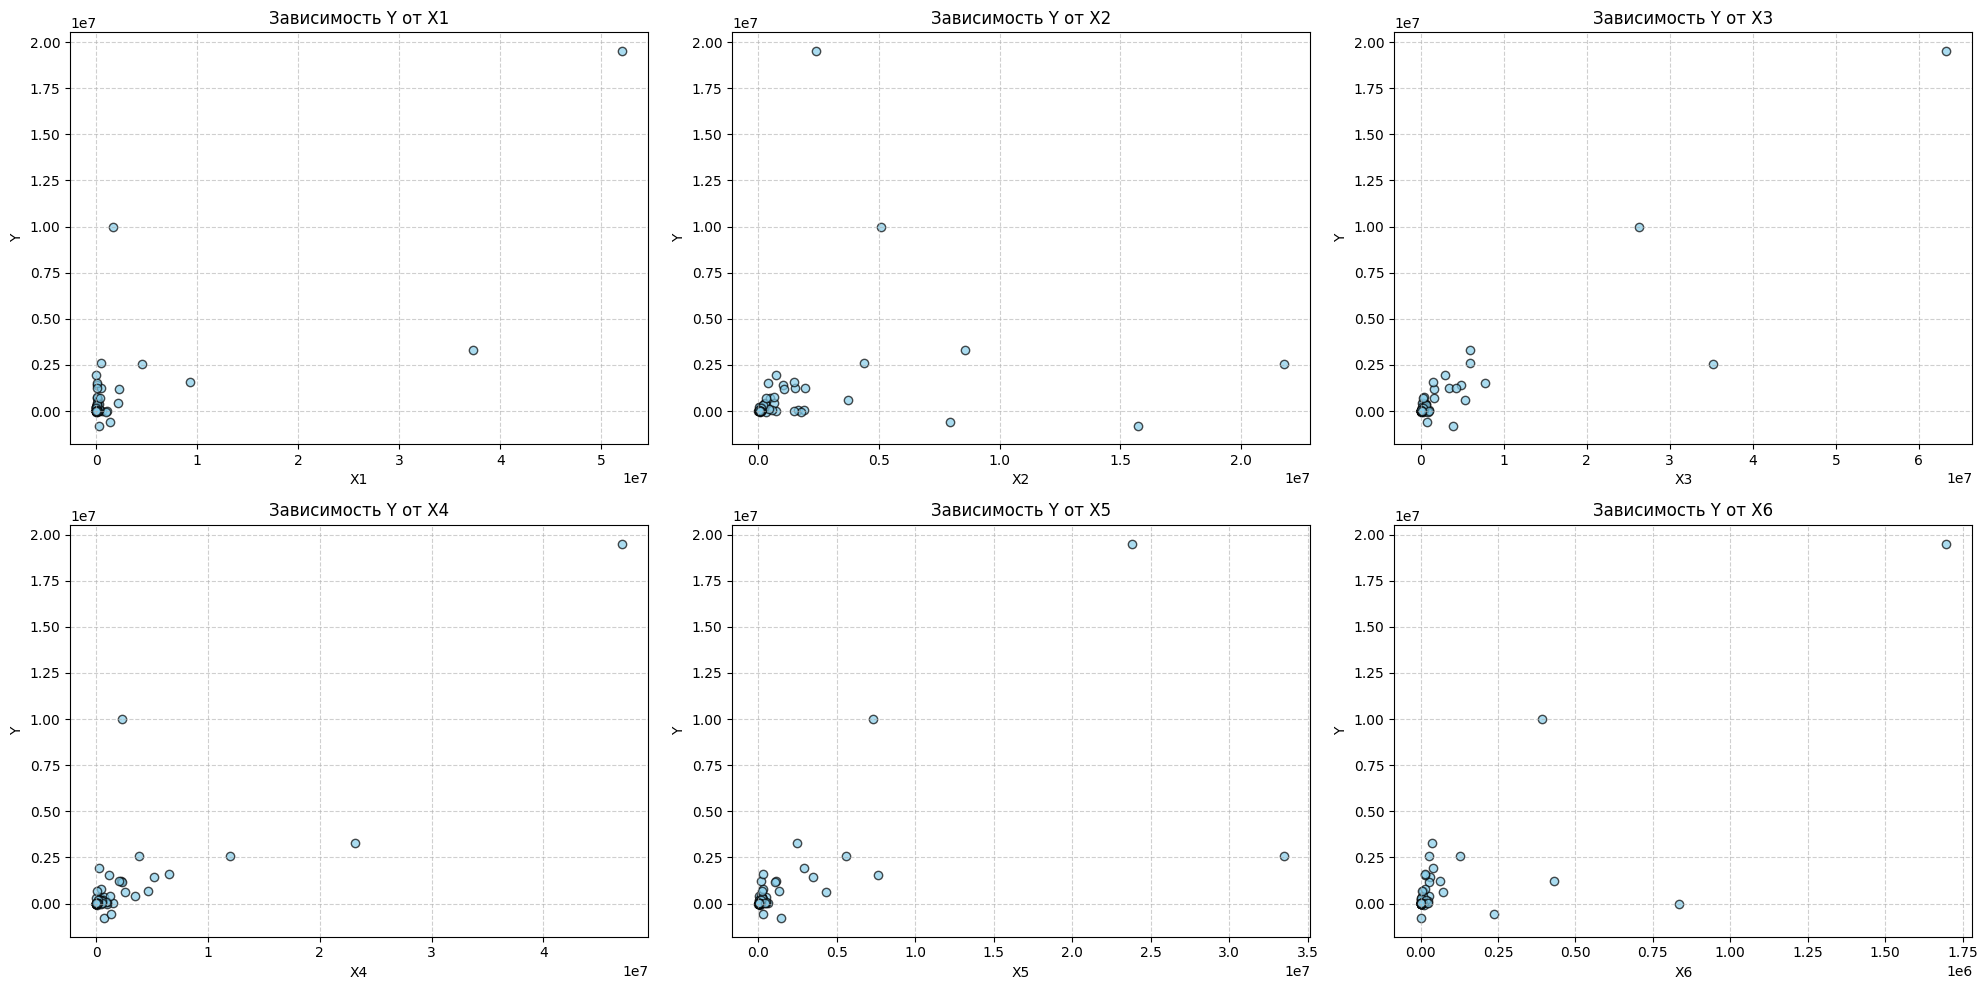

In [35]:
#Графические зависимости от Y
plt.figure(figsize=(20, 10))

for i, X in enumerate([X1, X2, X3, X4, X5, X6], start=1):
    plt.subplot(2, 3, i)
    plt.scatter(X, Y, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('X{}'.format(i))
    plt.ylabel('Y')
    plt.title('Зависимость Y от X{}'.format(i))
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Когда мы построили Гистограмы, можем сделать промежуточный вывод о том, что самые значимые столбцы это запасы продуктов(X6),
Дебиторская задолженность(X5). Они более значимые.

#Удаление выбросов, буду использовать межквартильный диапазон.

In [36]:
# Проверим y на выбросы.
Q1 = np.quantile(Y, 0.25)
Q3 = np.quantile(Y, 0.75)
IQR = Q3 - Q1

# Если выбросы есть, то заменим их на медиану.
Y_median = np.median(Y)
Y = [Y_median if i < Q1 - 1.5 * IQR or i > Q3 + 1.5 * IQR else i for i in Y]

In [ ]:
# Для y и x_1
data_1 = pd.DataFrame({'Y': Y, 'X1': X1})

Q1 = data_1.quantile(0.25)
Q3 = data_1.quantile(0.75)
IQR = Q3 - Q1

# Если выбросы есть, то заменяем их на медиану.
X1_median = data_1['X1'].median()
data_1.loc[data_1['X1'] < Q1['X1'] - 1.5 * IQR['X1'], 'X1'] = X1_median
data_1.loc[data_1['X1'] > Q3['X1'] + 1.5 * IQR['X1'], 'X1'] = X1_median

# Проверяем, что выбросы удалились.

plt.figure(figsize=(5, 5))
plt.scatter(data_1['X1'], data_1['Y'])
plt.title('Y от X1')
plt.show()

In [ ]:
# Для Y и X2
data_2 = pd.DataFrame({'Y': Y, 'X2': X2})

Q1 = data_2.quantile(0.25)
Q3 = data_2.quantile(0.75)
IQR = Q3 - Q1

# Если выбросы есть, то заменяем их на медиану.
X2_median = data_2['X2'].median()
data_2.loc[data_2['X2'] < Q1['X2'] - 1.5 * IQR['X2'], 'X2'] = X2_median
data_2.loc[data_2['X2'] > Q3['X2'] + 1.5 * IQR['X2'], 'X2'] = X2_median

# Проверяем, что выбросы удалились.

plt.figure(figsize=(5, 5))
plt.scatter(data_2['X2'], data_2['Y'])
plt.title('Y от X2')
plt.show()



In [ ]:
# Для Y и X3
data_3 = pd.DataFrame({'Y': Y, 'X3': X3})

Q1 = data_3.quantile(0.25)
Q3 = data_3.quantile(0.75)
IQR = Q3 - Q1

# Если выбросы есть, то заменяем их на медиану.
X3_median = data_3['X3'].median()
data_3.loc[data_3['X3'] < Q1['X3'] - 1.5 * IQR['X3'], 'X3'] = X3_median
data_3.loc[data_3['X3'] > Q3['X3'] + 1.5 * IQR['X3'], 'X3'] = X3_median

# Проверяем, что выбросы удалились.

plt.figure(figsize=(5, 5))
plt.scatter(data_3['X3'], data_3['Y'])
plt.title('Y от X3')
plt.show()


In [ ]:
# Для Y и X4
data_4 = pd.DataFrame({'Y': Y, 'X4': X4})

Q1 = data_4.quantile(0.25)
Q3 = data_4.quantile(0.75)
IQR = Q3 - Q1

# Если выбросы есть, то заменяем их на медиану.
X4_median = data_4['X4'].median()
data_4.loc[data_4['X4'] < Q1['X4'] - 1.5 * IQR['X4'], 'X4'] = X4_median
data_4.loc[data_4['X4'] > Q3['X4'] + 1.5 * IQR['X4'], 'X4'] = X4_median

# Проверяем, что выбросы удалились.

plt.figure(figsize=(5, 5))
plt.scatter(data_4['X4'], data_4['Y'])
plt.title('Y от X4')
plt.show()


In [ ]:
# Для Y и X5
data_5 = pd.DataFrame({'Y': Y, 'X5': X5})

Q1 = data_5.quantile(0.25)
Q3 = data_5.quantile(0.75)
IQR = Q3 - Q1

# Если выбросы есть, то заменяем их на медиану.
X5_median = data_5['X5'].median()
data_5.loc[data_5['X5'] < Q1['X5'] - 1.5 * IQR['X5'], 'X5'] = X5_median
data_5.loc[data_5['X5'] > Q3['X5'] + 1.5 * IQR['X5'], 'X5'] = X5_median

# Проверяем, что выбросы удалились.

plt.figure(figsize=(5, 5))
plt.scatter(data_5['X5'], data_5['Y'])
plt.title('Y от X5')
plt.show()

In [ ]:
# Для Y и X6
data_6 = pd.DataFrame({'Y': Y, 'X6': X6})

Q1 = data_6.quantile(0.25)
Q3 = data_6.quantile(0.75)
IQR = Q3 - Q1

# Если выбросы есть, то заменяем их на медиану.
X6_median = data_6['X6'].median()
data_6.loc[data_6['X6'] < Q1['X6'] - 1.5 * IQR['X6'], 'X6'] = X6_median
data_6.loc[data_6['X6'] > Q3['X6'] + 1.5 * IQR['X6'], 'X6'] = X6_median

# Проверяем, что выбросы удалились.

plt.figure(figsize=(5, 5))
plt.scatter(data_6['X6'], data_6['Y'])
plt.title('Y от X6')
plt.show()


Повторное графическое представление данных

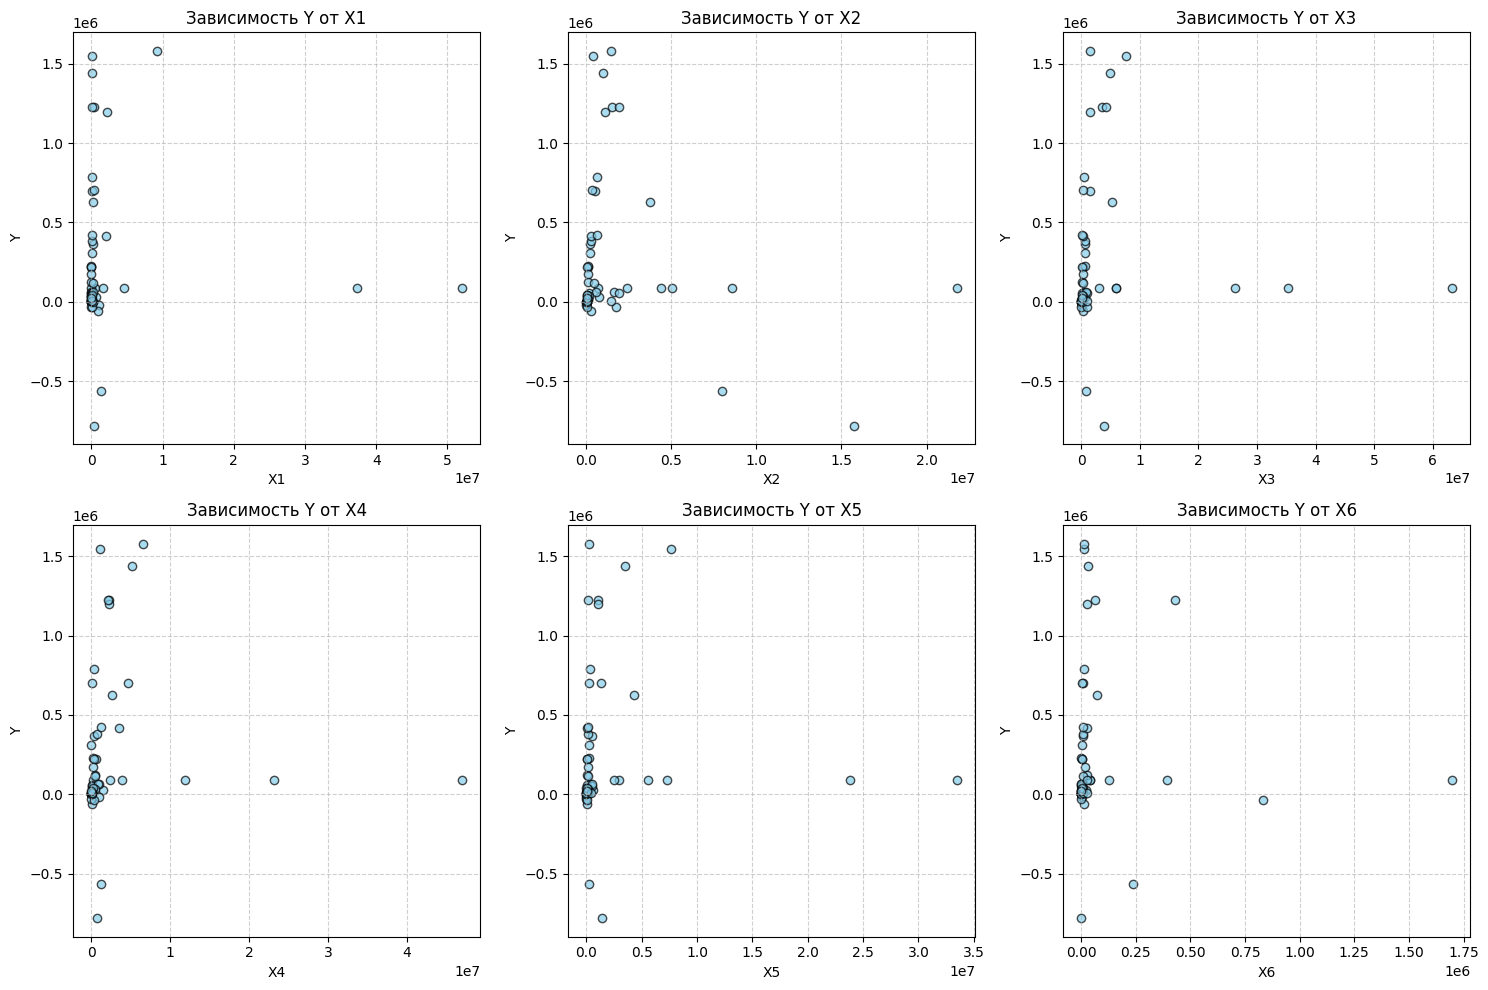

In [49]:
plt.figure(figsize=(15, 10))  # Измененные размеры графиков

for i, X in enumerate([X1, X2, X3, X4, X5, X6], start=1):
    plt.subplot(2, 3, i)
    plt.scatter(X, Y, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('X{}'.format(i))
    plt.ylabel('Y')
    plt.title('Зависимость Y от X{}'.format(i))
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



#Построение корреляционной матрицы

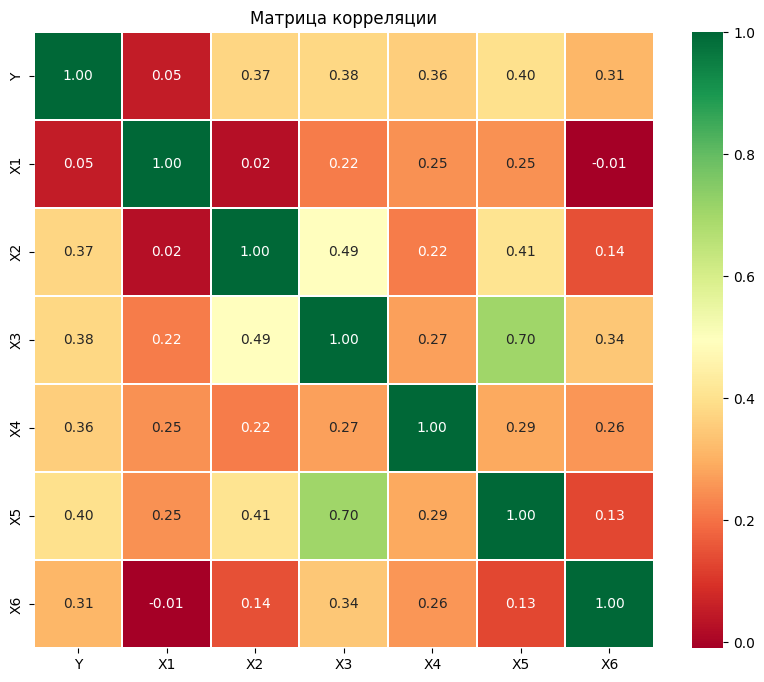

In [51]:
data = pd.DataFrame({'Y': Y, 'X1': data_1['X1'], 'X2': data_2['X2'], 'X3': data_3['X3'], 'X4': data_4['X4'], 'X5': data_5['X5'], 'X6': data_6['X6']})

plt.figure(figsize=(10, 8))

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, fmt=".2f")


plt.title('Матрица корреляции')


fig = plt.gcf()
fig.set_size_inches(10, 8)


plt.show()

In [54]:
for i in range(1, 7):
    r_corr = data['Y'].corr(data['X{}'.format(i)])
    print('Коэффициент корреляции Y и X_{}: {}'.format(i, r_corr))
    t_stat = r_corr * np.sqrt(len(Y) - 2) / np.sqrt(1 - r_corr ** 2)
    print('t-статистика: {}'.format(t_stat))
    alpha = 0.05
    t_alpha = sts.t.isf(alpha / 2, len(Y) - 2)
    print('t-критическое: {}'.format(t_alpha))
    if t_stat > t_alpha:
        print('Коэффициент корреляции Y и X_{} статистически значим'.format(i))
    else:
        print('Коэффициент корреляции Y и X_{} не статистически значим'.format(i))
    print('\n')

Коэффициент корреляции Y и X_1: 0.052754690763433615
t-статистика: 0.3809499572767155
t-критическое: 2.0066468031022118
Коэффициент корреляции Y и X_1 не статистически значим


Коэффициент корреляции Y и X_2: 0.3737053275314661
t-статистика: 2.9053256010600683
t-критическое: 2.0066468031022118
Коэффициент корреляции Y и X_2 статистически значим


Коэффициент корреляции Y и X_3: 0.3781458181104353
t-статистика: 2.945568374470061
t-критическое: 2.0066468031022118
Коэффициент корреляции Y и X_3 статистически значим


Коэффициент корреляции Y и X_4: 0.3572584707855418
t-статистика: 2.7582571045785302
t-критическое: 2.0066468031022118
Коэффициент корреляции Y и X_4 статистически значим


Коэффициент корреляции Y и X_5: 0.39945394590713595
t-статистика: 3.142070483711104
t-критическое: 2.0066468031022118
Коэффициент корреляции Y и X_5 статистически значим


Коэффициент корреляции Y и X_6: 0.3115723310505615
t-статистика: 2.364477979403268
t-критическое: 2.0066468031022118
Коэффициент корреля

##Построение модели множественной линейной регрессии

$$B = (X^T X)^{-1} X^T Y$$

In [55]:
X = np.array([np.ones(len(Y)), data_1['X1'], data_2['X2'], data_3['X3'], data_4['X4'], data_5['X5'], data_6['X6']]).T
B = np.linalg.inv(X.T @ X) @ X.T @ Y
for i in B:
    print(i)


-50578.67432983693
-0.21926594059748633
0.1607438367658226
-0.011056516735745875
0.12554358326905923
0.4525441043204953
9.17313383887597


$y = -50578.67 - 0.22x_1 + 0.16x_2 - 0.01x_3 + 0.13x_4 + 0.45x_5 + 9.17x_6$

$$t_{расч} = \frac{b_j}{s_{b_j}}$$
$$S_{b_j} = S \sqrt{z_{ij}}$$
$$S = \sqrt{\frac{\sum{(y_i - \hat{y_i})^2}}{n-m-1}}$$

In [56]:
def return_t(B, X, Y, n):
    S = np.sqrt(np.sum((Y - X @ B) ** 2) / (n - 7))
    S_b = S * np.sqrt(np.linalg.inv(X.T @ X).diagonal())
    t_stat = B / S_b
    return t_stat

t_stats = return_t(B, X, Y, len(Y))
print(t_stats)

[-0.5227505  -0.47547916  1.43977842 -0.07903026  1.54735132  1.4457649
  1.47789641]


In [58]:
alpha = 0.05

t_tabl = sts.t.isf(alpha / 2, len(Y) - 2)
t_tabl

2.0066468031022118

Заметим, что в данном случае  x3  почти не влияет на  y , поэтому его можно исключить из модели.

In [59]:
# исключаем x_3
X = np.array([np.ones(len(Y)), data_1['X1'], data_2['X2'], data_4['X4'], data_5['X5'], data_6['X6']]).T
B = np.linalg.inv(X.T @ X) @ X.T @ Y
for i in B:
    print(i)

-49918.802036078996
-0.22349280522569484
0.15794723545622727
0.1257605539268311
0.43728817637995043
9.002541367813068


In [60]:
t_stats = return_t(B, X, Y, len(Y) + 1)
print(t_stats)

[-0.52330776 -0.49306874  1.50732244  1.56722179  1.7933627   1.56324132]


In [61]:
alpha = 0.05

t_tabl = sts.t.isf(alpha / 2, len(Y) - 3)
t_tabl

2.0075837681558824

Заметим, что в данном случае  x1  в малой степени влияет на  y , поэтому его можно исключить из модели.

In [73]:
# исключаем X1
X = np.array([np.ones(len(Y)), data_2['X2'], data_4['X4'], data_5['X5'], data_6['X6']]).T
B = np.linalg.inv(X.T @ X) @ X.T @ Y
for i in B:
    print(i)

-65768.94492588051
0.16342511709673177
0.1172430615639176
0.41060747078880533
9.243581004701149


In [74]:
t_stats = return_t(B, X, Y, len(Y) + 2)
print(t_stats)

[-0.73802378  1.58069486  1.50784724  1.74049898  1.62349855]


In [75]:
alpha = 0.05

t_tabl = sts.t.isf(alpha / 2, len(Y) - 3)
t_tabl

2.0075837681558824

Заметим, что в данном случае  x4  меньше всех влияет на  y , поэтому его можно исключить из модели.

In [76]:
# исключаем X4
X = np.array([np.ones(len(Y)), data_2['X2'], data_5['X5'], data_6['X6']]).T
B = np.linalg.inv(X.T @ X) @ X.T @ Y
for i in B:
    print(i)

-33731.538891425604
0.17828150420216843
0.48526672845548535
11.141361065738188


In [77]:
t_stats = return_t(B, X, Y, len(Y) + 3)
print(t_stats)

[-0.38488624  1.71062454  2.07753308  1.98137631]


In [78]:
alpha = 0.05

t_tabl = sts.t.isf(alpha / 2, len(Y) - 3)
t_tabl

2.0075837681558824

Заметим, что в данном случае  x2  меньше всех влияет на  y , поэтому его можно исключить из модели.

In [79]:
# исключаем X2
X = np.array([np.ones(len(Y)), data_5['X5'], data_6['X6']]).T
B = np.linalg.inv(X.T @ X) @ X.T @ Y
for i in B:
    print(i)

10128.672801736418
0.6426702887413355
12.101224561051184


In [80]:
t_stats = return_t(B, X, Y, len(Y) + 4)
print(t_stats)

[0.11863913 2.93849444 2.12315052]


In [81]:
alpha = 0.05

t_tabl = sts.t.isf(alpha / 2, len(Y) - 3)
t_tabl

2.0075837681558824

In [82]:
if abs(t_stats[0]) > t_tabl:
    print("Reject H0: b0 is not zero")
else:
    print("Fail to reject H0: b0 is zero")

Fail to reject H0: b0 is zero


Получаем модель:\
$y = 0.64x_5 + 12.1x_6$\
Здесь признаки $x_5$ и $x_6$ являются наиболее значимыми, т.к $|t_{x_5}|$ и $|t_{x_6}| > t_{крит}$